## Introduction to accessing Sentinel-5P data on S3

Thanks to the support of [Amazon Web Service Public Dataset Program](https://aws.amazon.com/opendata/public-datasets/), [MEEO](www.meeo.it) as part of it's [ADAM Platform](https://adamplatform.eu/) project has created an archive of Sentinel-5P Level 2 data on the [Registry of Open Data on AWS](https://registry.opendata.aws/) (RODA). This data is Open Data and is available to anyone. In this tutorial we give a simple example of how someone can access the data, download a file and visualise the contents of the file. 

## Quick overview

Sentinel-5P is a satellite designed by the [European Space Agency](https://earth.esa.int/web/guest/missions/esa-eo-missions/sentinel-5p) (ESA) and funded by the European Commission's [Copernicus Programme](https://www.copernicus.eu/en). The satellite orbits the Earth continuously observing air quality. MEEO have made several key products of this programme available on **RODA**. A full description of the contents of the data archive can be found in [here](https://github.com/Sentinel-5P/data-on-s3/blob/master/DocsForAws/Sentinel5P_Description.md), in this tutorial we are going to look at carbon monoxide (CO) concentrations in the troposphere (bottom section of atmosphere).

The Sentinel-5P stored on Amazon is contained a bucket (a container for data) which can be browsed [here](https://meeo-s5p.s3.amazonaws.com/index.html#/?t=catalogs).

We are going to download a file for **CO** in [NetCDF](https://en.wikipedia.org/wiki/NetCDF) format and [Cloud Optimised GeoTIF](https://www.cogeo.org/). This tutorial will show how to use Python to visualise the data. We are using a Jupyter notebook to present the tutorial and you can download it [here](https://github.com/Sentinel-5P/data-on-s3/blob/master/notebooks/Sentinel5P_Tutorial.ipynb).

Required installations:

- Python 3 and Jupyter Notebook ([Anaconda](https://www.anaconda.com/distribution/) is a convenient distribution).
- Python Libraries: gdal, cartopy, rasterio and netcdf4. 

If you install Anaconda open a cmd box and type   etc.

- 'conda install -c conda-forge gdal'
- 'conda install -c conda-forge cartopy'
- 'conda install -c conda-forge rasterio'
- 'conda install -c conda-forge netcdf4'

This may take some time, depending on the speed of your computer and Internet connection.

## The Catalogue and getting the first file

We have provided a catalogue to the bucket which is available [here](https://meeo-s5p.s3.amazonaws.com/index.html#/?t=catalogs).

You navigate the bucket by clicking on the links. To navigate to the file that we are going to use for the Part 1, below, follow this trail: 

Cloud Optimized GeoTIFF (COG) **-->** Offline Processing Stream **-->** Carbon Monoxide (CO) total column **-->** 2020 **-->** 01 **-->** 02 **-->** S5P_OFFL_L2__CO_____20200102T035646_20200102T053816_11503_01_010302_20200103T174817 **-->** carbonmonoxide_total_column 

Following this path will lead to downloading the following file:

**S5P_OFFL_L2__CO_____20200102T035646_20200102T053816_11503_01_010302_20200103T174817_PRODUCT_carbonmonoxide_total_column_4326.tif**

Store this file on your local computer. This file is an image file of the carbon monoxide observations for the  2nd of January 2020. In this image the Sentinel-5P passed over the eastern seaboard of Australia.

## Part 1. Viewing the carbon monoxide from the bush fires in Australia using  the COG format

In this section we visualise the data in COG format file that you have just downloaded and stored locally on your computer.  To do this you will need to open a Jupyter Notebook and copy into it the code contained in each of the boxes below. Alternatively you can download the [Notebook]().


In [12]:
import cartopy.crs as ccrs
import rasterio

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from rasterio.plot import show

# For convenience I have stored the COG file in the same directory as this notebook.
# Note you may have given the file a different name.
fp = r"S5P_OFFL_L2__CO_____20200102T035646_20200102T053816_11503_01_010302_20200103T174817_PRODUCT_carbonmonoxide_total_column_4326.tif"

raster = rasterio.open(fp)

# This will print out the meta data associated with this file.
print(raster.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 9944, 'height': 4190, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.035, 0.0, -179.17988586425778,
       0.0, -0.035, 60.517539978027344)}


So above is the meta data assciated with this file. The rasterio raster object contains all the meta data that we need and we will use it below.

In [13]:
# Tell the visualizer what is a 'no data' flag, in this case, 
# from looking at the meta data above we see that it is -9999.0.
NoData = raster.nodatavals

# Data visualization units.
unit = '[ mol / m-2 ]'

# This is this title of the graph that will appear below.
long_name = 'Tropospheric vertical column of carbon monoxide (CO)'

# We need to know the geopgrphical extent of the data, this is contained in the raster object.
bbox = raster.bounds
extent=[bbox[0],bbox[2],bbox[1],bbox[3]]
print (bbox)

BoundingBox(left=-179.17988586425778, bottom=-86.13246002197266, right=168.86011413574224, top=60.517539978027344)


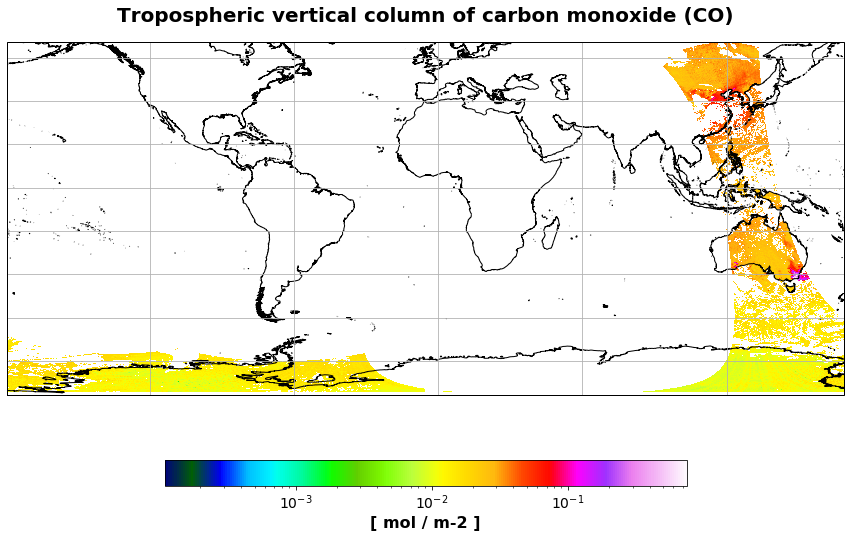

In [11]:
# Here we set up the parameters needed to display the geographical data correctly.
fig=plt.figure(figsize=(15, 12))

# Here we set up a simple Plate Carree geographical projection.  This  handled by cartopy library.
ax = plt.axes(projection=ccrs.PlateCarree())

# The latest coastline data gets downloaded here, there may be a delay the first time you run this notebook.
ax.coastlines(resolution='10m')
ax.gridlines()
ax.set_title(long_name, fontsize=20, pad=20.0, fontweight = 'bold')

# Here we set the colour map for matplotlib. e.g. 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'jet'
color = cm.gist_ncar

color.set_bad('white')

# In the norm setting below we normalise the data so that it scales between 0 to 1
img = plt.imshow(raster.read(1), cmap = color,extent = extent,norm=LogNorm(),transform=ccrs.PlateCarree())

cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(unit, fontsize=16, fontweight = 'bold')
cbar.ax.tick_params(labelsize=14)

plt.show()

When the plot is calculated and displayed (see above), you will see high concentrations of carbon monoxide that correspond with the areas of Australia where bush fires are occuring.


